# **주요 내용**

*   TripleNet 구현 (타 github repository 참고)
    *   https://github.com/KinWaiCheuk/Triplet-net-keras

In [2]:
notebookName = "20200526_2"
notebookName

'20200526_2'

In [49]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [4]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16698370024745122957, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 13416867381676246600
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15946700781739164876
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15701463552
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14338093372306803462
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [5]:
import platform
platform.platform()

'Linux-4.19.104+-x86_64-with-Ubuntu-18.04-bionic'

In [6]:
!nvidia-smi

Tue May 26 13:20:52 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    32W / 250W |    353MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**unzip**

In [5]:
import os

pcm_path = "./pcm_dataset"
wav_path = "./wav_dataset"

# mkdir
if not os.path.exists(pcm_path): os.mkdir(pcm_path)
if not os.path.exists(wav_path): os.mkdir(wav_path)

# unsip
!unzip -q "/content/drive/My Drive/ETRI/9_voice_download_4_Korean_English_by_Korean_part2.zip" -d "./pcm_dataset"

print(os.listdir(pcm_path)[:5])
print(len(os.listdir(pcm_path)))

replace ./pcm_dataset/GSF03031LJH0/SW201105KTRNGSF03031LJH0001.pcm? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
['GSF08333KJH0', 'GSM07355MIW0', 'I4F03423KSR0', 'GSM03224CHD0', 'GSF05134JHK0']
50


***.pcm to *.wav**

In [9]:
import wave

for i, folder_path in enumerate(sorted(os.listdir(pcm_path))):
    print("{}\t{}".format(i, folder_path))

    file_list = os.listdir(os.path.join(pcm_path, folder_path)) # label's path
    file_list_pcm = [files for files in file_list if files.endswith(".pcm")] # *.pcm files

    for j, file_path in enumerate(sorted(file_list_pcm)):
        with open(os.path.join(pcm_path, folder_path, file_path), "rb") as pcm_file:
            pcm_data = pcm_file.read()
        # save as {label}_{features}.wav format
        with wave.open(os.path.join(wav_path, "{}_{}.wav".format(i, j)), 'wb') as wav_file:
            wav_file.setparams((1, 2, 16000, 0, 'NONE', 'NONE')) # 16kHz, mono channel
            wav_file.writeframes(pcm_data)

0	GSF03031LJH0
1	GSF03732JJH0
2	GSF04122LHK0
3	GSF04524CJI0
4	GSF04623LWJ0
5	GSF04923PEY0
6	GSF05134JHK0
7	GSF05432KSY0
8	GSF05733HBH0
9	GSF05844LJR0
10	GSF06654KES0
11	GSF06742CKA0
12	GSF06833JYK0
13	GSF06934SYN0
14	GSF07132LCY0
15	GSF08142LDH0
16	GSF08233NEH0
17	GSF08333KJH0
18	GSF09025WYY0
19	GSF09431SHY0
20	GSF09844KKS0
21	GSM02434AGS0
22	GSM02544LHS0
23	GSM03224CHD0
24	GSM03321SDK0
25	GSM03634SJY0
26	GSM03823YJK0
27	GSM04233KMS0
28	GSM04424JBRC
29	GSM05953CJH0
30	GSM06044JBY0
31	GSM06235BJH0
32	GSM07042NSK0
33	GSM07355MIW0
34	GSM09534JHD0
35	GSM09644KCK0
36	GSM09752SCY0
37	I4F02224SDY0
38	I4F02631KSM0
39	I4F02821YRR0
40	I4F02933JSI0
41	I4F03423KSR0
42	I4F03543KSY0
43	I4F03922LKY0
44	I4F04732OIY0
45	I4F05332CJH0
46	I4F05625JSY0
47	I4F07443LJA0
48	I4F07633JSI0
49	I4F07852PKJ0


In [0]:
import numpy as np

num_labels = 5
num_features = 10
data_length = 3 ** 9

num_train_dataset = 5
num_test_dataset = num_features - num_train_dataset # 15 - 5 = 10

train_dataset_idx = [True] * num_train_dataset + [False] * (num_features - num_train_dataset)
test_dataset_idx = [False] * num_train_dataset + [True] * (num_features - num_train_dataset)

**train data, test data로 구분하여 numpy 저장 (*.npz)**

In [16]:
from scipy.io import wavfile

dataset = np.zeros((num_labels * num_features, data_length))
labels = np.zeros((num_labels * num_features))

for i in range(num_labels):
    for j in range(num_features):
        file_name = "{}_{}.wav".format(i, j)
        sample_rate, samples = wavfile.read(os.path.join(wav_path, file_name))
        
        start = int(len(samples) - data_length) // 2
        end = start + data_length
        
        dataset[i * num_features + j] = samples[start:end]
        labels[i * num_features + j] = i

train_dataset = dataset[train_dataset_idx * num_labels]
train_labels = labels[train_dataset_idx * num_labels]

test_dataset = dataset[test_dataset_idx * num_labels]
test_labels = labels[test_dataset_idx * num_labels]

# # save *.npy        
# np.save("./train_data", train_data)
# np.save("./train_labels", train_labels)

# np.save("./test_data", test_data)
# np.save("./test_labels", test_labels)

print("dataset.shape: {}, labels.shape: {}".format(dataset.shape, labels.shape))
print("train_dataset.shape: {}, train_labels.shape: {}".format(train_dataset.shape, train_labels.shape))
print("test_dataset.shape: {}, test_labels.shape: {}".format(test_dataset.shape, test_labels.shape))

dataset.shape: (50, 19683), labels.shape: (50,)
train_dataset.shape: (25, 19683), train_labels.shape: (25,)
test_dataset.shape: (25, 19683), test_labels.shape: (25,)


## **Triple NN**

In [0]:
from itertools import permutations

def generate_triplet(x, y, n_features, n_class):

    data_xy = tuple([x, y])
    triplet_pairs = np.zeros((n_class, n_features * (n_features-1) * (n_features - 1) * n_class, 3, data_length))

    for data_class in sorted(set(data_xy[1])):

        same_class_idx = np.where((data_xy[1] == data_class))[0]
        diff_class_idx = np.where(data_xy[1] != data_class)[0]
        
        # Generating Anchor-Positive pairs (from Cartesian  Proeuct)
        A_P_pairs = list(permutations(same_class_idx, 2))
        A_P_N_pairs = [[
                        data_xy[0][a[0]],   # Anchor
                        data_xy[0][a[1]],   # Positive
                        data_xy[0][b]          # Negative
                        ] for a in A_P_pairs for b in diff_class_idx]

        triplet_pairs[int(data_class)] = A_P_N_pairs

    return np.array(triplet_pairs)

In [43]:
X_train = generate_triplet(train_dataset, train_labels, 5, 5)
X_test = generate_triplet(test_dataset, test_labels, 5, 5)

X_train = X_train.reshape(X_train.shape[0] * X_train.shape[1], X_train.shape[2], X_train.shape[3])
X_test = X_test.reshape(X_test.shape[0] * X_test.shape[1], X_test.shape[2], X_test.shape[3])

print("X_train.shape: {}".format(X_train.shape))
print("X_test.shape: {}".format(X_test.shape))

X_train.shape: (2000, 3, 19683)
X_test.shape: (2000, 3, 19683)


In [0]:
from tensorflow.keras import backend as K

def triplet_loss(y_true, y_pred, alpha = 0.4):
    """
    Implementation of the triplet loss function
    Arguments:
    y_true -- true labels, required when you define a loss in Keras, you don't need it in this function.
    y_pred -- python list containing three objects:
            anchor -- the encodings for the anchor data
            positive -- the encodings for the positive data (similar to anchor)
            negative -- the encodings for the negative data (different from anchor)
    Returns:
    loss -- real number, value of the loss
    """
    print('y_pred.shape = ',y_pred)
    
    total_lenght = y_pred.shape.as_list()[-1]
    # print('total_lenght=',  total_lenght)
    # total_lenght =12
    
    anchor = y_pred[:,0:int(total_lenght*1/3)]
    positive = y_pred[:,int(total_lenght*1/3):int(total_lenght*2/3)]
    negative = y_pred[:,int(total_lenght*2/3):int(total_lenght*3/3)]

    # distance between the anchor and the positive
    pos_dist = K.sum(K.square(anchor-positive),axis=1)

    # distance between the anchor and the negative
    neg_dist = K.sum(K.square(anchor-negative),axis=1)

    # compute loss
    basic_loss = pos_dist - neg_dist + alpha
    loss = K.maximum(basic_loss,0.0)
 
    return loss

In [0]:
from tensorflow.keras.models import Model, Sequential

def create_base_network(in_dims = [data_length, 1]):
    """
    Base network to be shared.
    """
    model = tf.keras.Sequential([
        tf.keras.layers.Conv1D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu',
                                                input_shape= (in_dims[0], in_dims[1])),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling1D(pool_size = 3),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Conv1D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling1D(pool_size = 3),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Conv1D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling1D(pool_size = 3),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Conv1D(filters = 256, kernel_size = 3, padding = 'same', activation = 'relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling1D(pool_size = 3),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(256, activation = None),
        tf.keras.layers.Lambda(lambda x: tf.math.l2_normalize(x, axis = 1)) # L2 normalize embeddings
    ]) 
    
    return model

In [0]:
from tensorflow.keras.layers import Input, concatenate

anchor_input = Input((data_length, 1), name='anchor_input')
positive_input = Input((data_length, 1), name='positive_input')
negative_input = Input((data_length, 1), name='negative_input')

# Shared embedding layer for positive and negative items
Shared_DNN = create_base_network()

encoded_anchor = Shared_DNN(anchor_input)
encoded_positive = Shared_DNN(positive_input)
encoded_negative = Shared_DNN(negative_input)

merged_vector = concatenate([encoded_anchor, encoded_positive, encoded_negative], axis=-1, name = 'merged_layer')

model = Model(inputs=[anchor_input,positive_input, negative_input], outputs = merged_vector)
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = triplet_loss)

In [59]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
anchor_input (InputLayer)       [(None, 19683, 1)]   0                                            
__________________________________________________________________________________________________
positive_input (InputLayer)     [(None, 19683, 1)]   0                                            
__________________________________________________________________________________________________
negative_input (InputLayer)     [(None, 19683, 1)]   0                                            
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 256)          197312      anchor_input[0][0]               
                                                                 positive_input[0][0]       

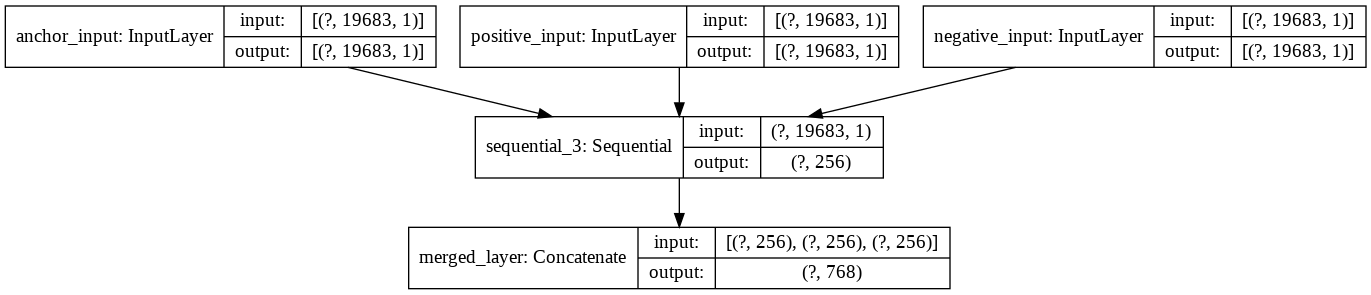

In [60]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True, to_file = 'model.png')

In [61]:
Anchor = X_train[:,0,:].reshape(-1, data_length, 1)
Positive = X_train[:,1,:].reshape(-1, data_length, 1)
Negative = X_train[:,2,:].reshape(-1, data_length, 1)
Anchor_test = X_test[:,0,:].reshape(-1, data_length, 1)
Positive_test = X_test[:,1,:].reshape(-1, data_length, 1)
Negative_test = X_test[:,2,:].reshape(-1, data_length, 1)

Y_dummy = np.empty((Anchor.shape[0], 300))
Y_dummy2 = np.empty((Anchor_test.shape[0], 1))

history = model.fit(
    [Anchor, Positive, Negative], y = Y_dummy,
    validation_data = ([Anchor_test, Positive_test, Negative_test], Y_dummy2),
    batch_size = 64, epochs = 100,
    verbose = 1)

Epoch 1/100
y_pred.shape =  Tensor("model_1/merged_layer/concat:0", shape=(None, 768), dtype=float32)
y_pred.shape =  Tensor("model_1/merged_layer/concat:0", shape=(None, 768), dtype=float32)
32/32 [==============================] - 8s 255ms/step - loss: 0.0740 - val_loss: 0.1049
Epoch 2/100
32/32 [==============================] - 8s 242ms/step - loss: 0.0094 - val_loss: 0.1081
Epoch 3/100
32/32 [==============================] - 8s 242ms/step - loss: 0.0021 - val_loss: 0.1891
Epoch 4/100
32/32 [==============================] - 8s 243ms/step - loss: 0.0010 - val_loss: 0.1399
Epoch 5/100
32/32 [==============================] - 8s 243ms/step - loss: 5.0607e-04 - val_loss: 0.1787
Epoch 6/100
32/32 [==============================] - 8s 245ms/step - loss: 7.6946e-04 - val_loss: 0.1170
Epoch 7/100
32/32 [==============================] - 8s 241ms/step - loss: 3.6002e-04 - val_loss: 0.1216
Epoch 8/100
32/32 [==============================] - 8s 242ms/step - loss: 0.0000e+00 - val_loss: 0.1

In [62]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

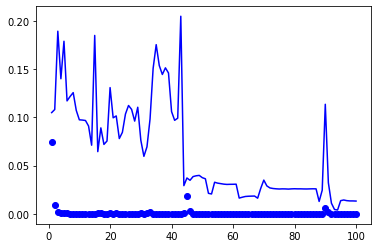

In [64]:
from matplotlib import pyplot as plt
plt.plot(np.arange(1, 100 + 1, 1), history.history['loss'], 'bo')
plt.plot(np.arange(1, 100 + 1, 1), history.history['val_loss'], 'b')

In [0]:
# callback
def scheduler(epoch, lr):
    if not epoch:
        return lr
    return 0.3 * lr if not (epoch % 50) else lr

# Train the network
history = model.fit(
    train_dataset,
    verbose = 1,
    epochs = 100)
    # callbacks = [tf.keras.callbacks.LearningRateScheduler(scheduler)])

In [0]:
results = model.predict(test_dataset)

In [0]:
results.shape

In [0]:
import io
import numpy as np

# Save test embeddings for visualization in projector
np.savetxt("vecs.tsv", results, delimiter='\t')

out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for img, labels in tfds.as_numpy(test_dataset):
    [out_m.write(str(x) + "\n") for x in labels]
out_m.close()


try:
    from google.colab import files
    files.download('vecs.tsv')
    files.download('meta.tsv')
except:
    pass

In [0]:
history.history.keys()

In [0]:
from matplotlib import pyplot as plt
plt.plot(np.arange(1, 100 + 1, 1), history.history['loss'])

**Embedding Visualization with t-Stochastic Neighbor Embedding (t-SNE)**

*   https://lovit.github.io/nlp/representation/2018/09/28/tsne/
*   https://lovit.github.io/nlp/representation/2018/09/28/tsne/


In [0]:
import numpy as np

n_data_per_class = num_features - num_train_data
n_classes = num_labels

x = model.predict(test_dataset)
y = test_labels

In [0]:
x.shape

In [0]:
y.shape

In [0]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.io import export_png

output_notebook()

title = '{} classes {} points'.format(n_classes, n_classes * n_data_per_class)

def draw_figure(x, y, title, show_figure=True,
    colors = 'firebrick darksalmon lightslategray darkslateblue forestgreen'.split()):

    p = figure(width=400, height=400, title=title)
    for c in range(n_classes):
        idx = np.where(y == c)[0]
        x_ = x[idx]
        p.scatter(x_[:,0], x_[:,1], fill_color=colors[c], line_color=colors[c])
    if show_figure:
        show(p)
    return p

p = draw_figure(x, y, title)

In [0]:
from sklearn.manifold import TSNE

plots = []
for perplexity in [2, 5, 10, 30, 100, 200, 500, 1000]:
    z = TSNE(
        n_components = 2,
        perplexity = perplexity
    ).fit_transform(x)
    title = 't-SNE with perplexity = {}'.format(perplexity)
    plots.append(draw_figure(z, y, title, show_figure = False))

gp = gridplot([
               [plots[0], plots[1]],
               [plots[2], plots[3]], 
               [plots[4], plots[5]],
               [plots[6], plots[7]]])
show(gp)

**K-Nearest Neighbor Algorithm**

In [0]:
from sklearn.neighbors import KNeighborsClassifier

x = TSNE(n_components = 2).fit_transform(model.predict(train_dataset))
y = train_labels

classifier = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
classifier.fit(x, y)

In [0]:
_x = TSNE(n_components = 2).fit_transform(model.predict(test_dataset))
_y = test_labels

print(classifier.score(_x, _y))